In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# 알콜 도수와 색(하얀색>빨간색)
x = [[10, 0], [15, 5], [20, 10.0]]
#y = [[3], [6], [9.]]
y = [3, 6, 9]

In [3]:
# min-max 정규화
xmin = np.min(x, axis=0)
xmax = np.max(x, axis=0)
xn = (x - xmin) / (xmax-xmin)

In [4]:
# 실수로 변형해주기
xx = tf.constant(xn, dtype=tf.float32)
yy = tf.constant(y, dtype=tf.float32)
w = tf.Variable(tf.random_normal(shape=[tf.shape(x)[-1]]))
b = tf.Variable(tf.random_normal(shape=[1]))

#h = tf.reduce_sum(w * xx, axis=1, keepdims=True) + b
h = tf.reduce_sum(w * xx, axis=1) + b
cost = tf.reduce_mean((h - y)**2)

#경사하강법(cost를 w와 b로 미분)
opt = tf.train.GradientDescentOptimizer(0.5) # learning_rate 줄이기
train = opt.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

W0903 11:17:23.676633  3356 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1205: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [5]:
# 발산하면? 1. learning_rate 줄이기 2. 데이터 정규화 3. 모델 다시 만들기 4. 초기값을 조절하기 5. 데이터 수정
for i in range(1000):
    sess.run(train)
sess.run(cost)
# cost가 너무 큰 곳에 수렴하는 것은 지역 최저점이며, 지역최저점에 존재하면? learning_rate 늘리기

1.8947807e-14

In [6]:
sess.run(h), y

(array([3.0000002, 6.       , 9.       ], dtype=float32), [3, 6, 9])

# 와인 점수 예측하기
### 와인의 화학성분과 색 등으로 점수를 매기는 문제입니다

## 목표 Y : 와인 점수
## 입력 X : 화학성분, 색 등등
### Y = WX + b 의 선형함수로 데이터를 모델링하자

In [228]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
wine = pd.read_csv(url, sep=';')
wine.shape

(1599, 12)

In [229]:
wine.isna().sum().sum()

0

In [230]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [235]:
# wine_x = wine.iloc[:, :-1]
# wine_y = wine.iloc[:, -1]
wine_x = wine.drop(columns='quality')
wine_y = wine['quality']


#wine_x = np.array(wine_x)
#wine_y = np.array(wine_y)
#wine_x = np.float32(wine_x)
#wine_y = np.float32(wine_y)
wine_x.shape, wine_y.shape

((1599, 11), (1599,))

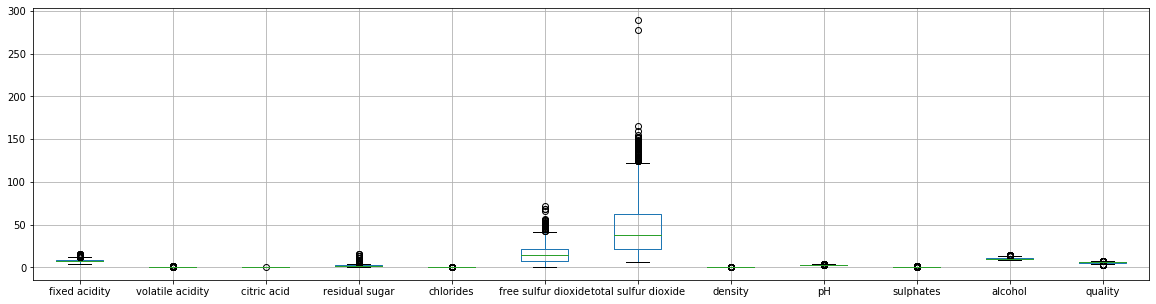

In [236]:
wine.boxplot(figsize=(20, 5))

In [237]:
# 정규화 (박스가 가운데에 있는 것이 아니므로, minmax보다는 표준편차 정규화로)
# 표준편차 정규화 : (x - 평균) / 표준편차
wine_xn = (wine_x - np.mean(wine_x, axis=0)) / np.std(wine_x, axis=0)

# wine_xn = (wine_x - np.min(wine_x, axis=0)) / (np.max(wine_x, axis=0)-np.min(wine_x, axis=0))
wine_xn.shape

(1599, 11)

In [238]:
# 다항 x를 추가해보자, 데이터의 특징이 직선이 아니고, 곡선으로 분포되어 있을 수 있다.
from sklearn.preprocessing import PolynomialFeatures
fp = PolynomialFeatures(degree=2)
wine_xn = fp.fit_transform(wine_xn)
#fp.get_feature_names()
wine_xn.shape

(1599, 78)

In [239]:
wine_xn.min(), wine_xn.max(), wine_xn.mean(), wine_y.shape, wine_y.min(), wine_y.max()

(-41.09584500917045, 123.81089796523916, 0.1699584914661557, (1599,), 3, 8)

In [245]:
# 실수로 변형해주기
wine_x = np.array(wine_x)
wine_y = np.array(wine_y)
wine_xx = tf.constant(wine_xn, dtype=tf.float32)
wine_yy = tf.constant(wine_y, dtype=tf.float32)
wine_w = tf.Variable(tf.random_normal(shape=[tf.shape(wine_xx)[-1]]))
wine_b = tf.Variable(tf.random_normal(shape=[1]))

#h = tf.reduce_sum(w * xx, axis=1, keepdims=True) + b
wine_h = tf.reduce_sum(wine_w * wine_xx, axis=1) + wine_b
wine_cost = tf.reduce_mean(tf.square(wine_h - wine_yy))

#경사하강법(cost를 w와 b로 미분)
wine_opt = tf.train.GradientDescentOptimizer(0.0001) # learning_rate 줄이기
wine_train = opt.minimize(wine_cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [246]:
#for i in range(100):
#    _, w = sess.run([wine_train, wine_w])
#   print('w', w)
#sess.run(wine_cost)

for i in range(100):
    sess.run(wine_train)
sess.run(wine_cost)

nan

### 정확도 예측방법 : 예측==정답
np.mean(np.round(sess.run(wine_h))== wine_y)

In [247]:
# 1점 차이는 허용
np.mean(np.logical_and(sess.run(wine_h) > wine_y -1, sess.run(wine_h) < wine_y + 1))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  


0.0

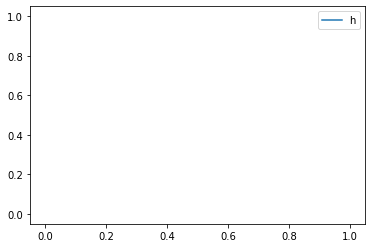

In [248]:
#plt.plot(wine_y, label='y')
plt.plot(sess.run(wine_h), label='h')
plt.legend()

# 발산하면? 
1. 상관이 있는가
1. learning_rate 줄이기 
1. 데이터 정규화 (minmax는 이상치가 많지 않을때, 정규분포는 이상치가 많을 떄) 
1. 파라미터 w의 초기값을 조절하기 
1. 데이터 수정
1. 모델 다시 만들기 

In [202]:
wine_y.shape, sess.run(wine_h).shape

((1599,), (1599,))